## Занятие 12
### Практическое задание

## 1. Линейная регрессия

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
model = LinearRegression()

fit_intercept – логический (True по умолчанию) параметр, который решает, вычислять отрезок b₀ (True) или рассматривать его как равный нулю (False).

normalize – логический (False по умолчанию) параметр, который решает, нормализовать входные переменные (True) или нет (False).

copy_X – логический (True по умолчанию) параметр, который решает, копировать (True) или перезаписывать входные переменные (False).

n_jobs – целое или None (по умолчанию), представляющее количество процессов, задействованных в параллельных вычислениях. None означает отсутствие процессов, при -1 используются все доступные процессоры.

In [4]:
model.fit(x, y)

LinearRegression()

In [5]:
model = LinearRegression().fit(x, y)

In [6]:
r_sq = model.score(x, y)

In [7]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7158756137479542


Коэффициент детерминации ($R^2$ — R-квадрат) — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. 

In [8]:
print('intercept:', model.intercept_)

intercept: 5.633333333333329


In [9]:
print('slope:', model.coef_)

slope: [0.54]


In [10]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))

In [11]:
y_pred = model.predict(x)

In [12]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [13]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


## 2. Дерево решений

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('Diabetes.txt')
df.head()

,Bmi,Age,Diabetes
0,31,45,yes
1,29,47,no
2,27,55,no
3,35,53,yes
4,28,51,no


In [16]:
x=df.iloc[:,:2]
y=df.iloc[:,2:]

In [17]:
x.head(3)

,Bmi,Age
0,31,45
1,29,47
2,27,55


In [18]:
y.head(3)

,Diabetes
0,yes
1,no
2,no


In [19]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [20]:
model.score(x,y)

1.0

In [21]:
model.predict([[29,47]])

array(['no'], dtype=object)

In [22]:
model.predict([[45,47]])

array(['yes'], dtype=object)

[Text(133.92000000000002, 181.2, 'X[0] <= 30.0\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 43.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

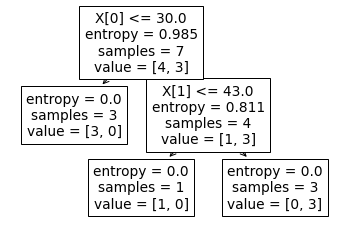

In [23]:
tree.plot_tree(model)

## 2. Кластеризация

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


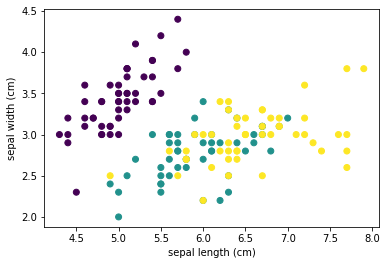

In [24]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt

# Загружаем набор данных
iris_df = datasets.load_iris()

# Методы, доступные для набора данных
print(dir(iris_df))

# Признаки
print(iris_df.feature_names)

# Метки
print(iris_df.target)

# Имена меток
print(iris_df.target_names)

# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width

# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

### Метод k-средних

In [25]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Загружаем набор данных
iris_df = datasets.load_iris()

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(iris_df.data)

# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### Иерархическая кластеризация

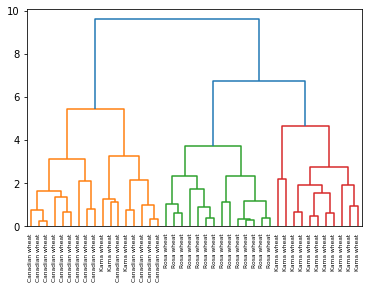

In [26]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
seeds_df = pd.read_csv(
"http://qps.ru/jNZUT")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()


### Понижение размерности с методом t-SNE

Метод t-SNE (t-distributed stochastic neighbor embedding) представляет собой один из методов обучения без учителя, используемых для визуализации, например, отображения пространства высокой размерности в двух- или трехмерное пространство. t-SNE расшифровывается как распределенное стохастическое соседнее вложение.

Метод моделирует каждый объект пространства высокой размерности в двух- или трехкоординатную точку таким образом, что близкие по характеристикам элементы данных в многомерном пространстве (например, датасете с большим числом столбцов) проецируются в соседние точки, а разнородные объекты с большей вероятностью моделируются точками, далеко отстоящими друг от друга. Математическое описание работы метода можно найти здесь (https://habr.com/ru/post/267041/).

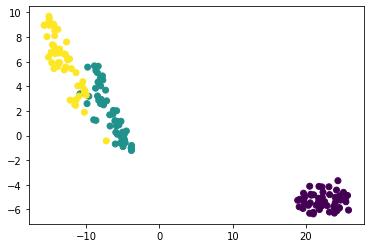

In [27]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Загрузка датасета
iris_df = datasets.load_iris()

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(iris_df.data)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

### Метод кластеризации на основе плотности DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума) 

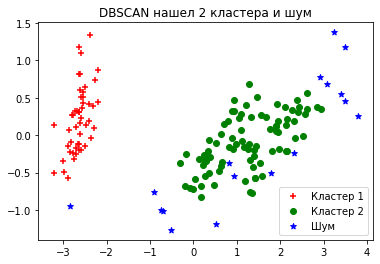

In [28]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Загружаем датасет
iris = load_iris()

# Определяем модель
dbscan = DBSCAN()

# Обучаем
dbscan.fit(iris.data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()